## Exercicio 10
Escreva um programa para obter o resultado da seguinte operação:

$$
S = 10000 - \sum_{k=1}^{n} x
$$

Para:
a) n = 100000 e x = 0.1
b) n = 80000 e x = 0.135


In [2]:
def calculate_S_iterative(n, x):
    """Iteratively computes S = 10000 - sum(x for k=1 to n)"""
    S = 10000
    for _ in range(n):
        S -= x
    return S

# a)
n = 100000
x = 0.1
# 100.000 * 0.1 = 10.000
S = calculate_S_iterative(n, x)
print(f"n= 100000, x= 0.1, S = {S}")

#b)
n = 80000
x = 0.1
# 80.000 * 0.125 = 10.000
S = calculate_S_iterative(n, x)
print(f"n= 80000, x= 0.135, S = {S}")

n= 100000, x= 0.1, S = -1.884864639367656e-08
n= 80000, x= 0.135, S = 1999.9999999804281


No primeiro caso, tivemos um numero negativo muito grande
No segundo caso, tivemos um numero positivo proximo a 2000

In [ ]:
def calculate_S(n, x):
    """Recursively computes S = 10000 - sum(x for k=1 to n)"""
    if n == 0:
        return 10000
    else:
        return calculate_S(n-1, x) - x

# Example usage:
n = 100000
x = 0.1
S = calculate_S(n, x)
print(f"S = {S}")

R: A tentativa de implementar a solução acima não funcionou pois estoura o limite de chamadas recursivas, (stack overflow)

## Exercicio 02
Escreva um programa em uma linguagem conhecida, para calcular $e^x$ pela série de Taylor com n termos. O valor de x e o número de termos da série, n, são dados de entrada deste programa. Para valores negativos de x, o programa deve calcular $e^x$ de duas formas: em uma delas o valor de x é usado diretamente na série de Taylor e, na outra forma, o valor usado na série é y = -x, e, em seguida, calcula-se o valor de $e^x$ através de $\frac{1}{e^x}$

##### Anotações
A série de taylor é:
    $$P(x) = f(0) + \frac{df}{dx}(0) \frac{x^1}{1!}+
    \frac{d^2f}{dx^2}(0) \frac{x^2}{2!}+
    \frac{d^3f}{dx^3}(0) \frac{x^3}{3!}+
    \frac{d^4f}{dx^4}(0) \frac{x^4}{4!}+...$$
Mas quando estamos aproximando da função $e^x$ no ponto $x = 0$ as derivadas terão valor 1, e o primeiro termo também:
    $$e^x = 1 + \frac{x^1}{1!}+
    \frac{x^2}{2!}+
    \frac{x^3}{3!}+
    \frac{x^4}{4!}+...$$
Podemos então utilizar essa aproximação, quando estivermos proximos a zero, para evitar de realizar a multiplicação de $e$ por $e$

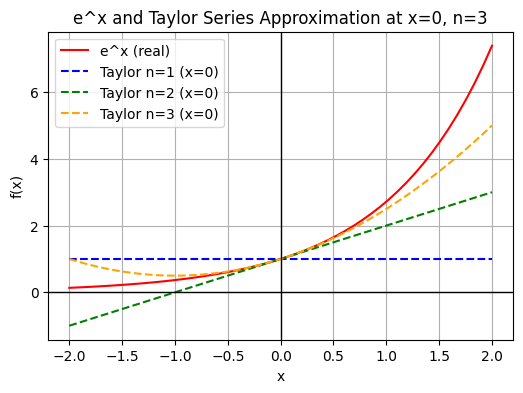

In [ ]:
import numpy
import matplotlib.pyplot as plt
import math

def taylor_exp(x, n):
    """Computes the Taylor series expansion of e^x up to n terms."""
    S = 1
    for k in range(1, n):
        S += (numpy.power(x, k) / math.factorial(k))
    return S

def plot_explanation_graph():
    x_vals = numpy.linspace(-2, 2, 50)
    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, numpy.exp(x_vals), label='e^x (real)', color='red')
    plt.plot(x_vals, [taylor_exp(x, 1) for x in x_vals], label='Taylor n=1 (x=0)', linestyle='--', color='blue')
    plt.plot(x_vals, [taylor_exp(x, 2) for x in x_vals], label='Taylor n=2 (x=0)', linestyle='--', color='green')
    plt.plot(x_vals, [taylor_exp(x, 3) for x in x_vals], label='Taylor n=3 (x=0)', linestyle='--', color='orange')
    plt.axvline(x=0, color='black', linewidth=1)
    plt.axhline(y=0, color='black', linewidth=1)
    plt.title('e^x and Taylor Series Approximation at x=0, n=3')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_explanation_graph()

##### O problema de calcular ( e^x ) para ( x < 0 ) com a série de Taylor
A série de Taylor para ( e^x ) é:  $$e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots$$
Quando ( x ) é positivo, cada termo da série vai crescendo de forma controlada, e a soma converge rapidamente para o valor correto.
Se você calcular ( $e^{-10}$ ) usando a série de Taylor, vai precisar de muitos termos para chegar perto do valor correto, e mesmo assim pode ter erro numérico. Já que somar valores grandes e de sinais opostos tendo como resultado um número pequeno poderá causar essa perca de precisão.
$$e^{-10} = 1 + \frac{-10}{1!} + \frac{{-10}^2}{2!} + \frac{{-10}^3}{3!} + \cdots$$
$$e^{-10} = 1 -10 + \frac{100}{2} - \frac{1000}{6} + \cdots$$
$$e^{-10} = 1 -10 + 50 - 166.666... + \cdots$$
Por esse motivo, quando o valor for negativo, vamos inverter seu sinal, aproximar o resultado utilizando a serie de taylor, no ponto 0. E depois calcular:
$$\frac{1}{e^{10}} = e^{-10}$$

a) Teste seu programa com vários valores de x (x pŕoximo de zero e x distante de zero) e, para cada valor de x, teste o cálculo da série com vários valores de n. Analise os resultados obtidos.

In [1]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas

def taylor_exp(x, n):
    """Computes the Taylor series expansion of e^x up to n terms."""
    S = 1
    for k in range(1, n):
        S += (numpy.power(x, k) / math.factorial(k))
    return S

# Vetores de x e n
x_next_to_zero_vals = numpy.linspace(-2, 2, 4)
x_far_from_zero_vals = numpy.linspace(8, 10, 4)
x_far_from_zero_negative_vals = numpy.linspace(-10, -8, 4)
n_vals = list(range(1, 20))

# Acumule os resultados em uma lista
results = []

for x in x_next_to_zero_vals:
    for n in n_vals:
        actual = numpy.exp(x)
        taylor_approx = taylor_exp(x, n)
        if x < 0:
            neg_taylor = 1 / taylor_exp(-x, n)
            results.append({"x": x, "n": n, "taylor_exp": taylor_approx, "actual_exp": actual, "neg_taylor_exp": neg_taylor})
        else:
            results.append({"x": x, "n": n, "taylor_exp": taylor_approx, "actual_exp": actual, "neg_taylor_exp": None})

for x in x_far_from_zero_vals:
    for n in n_vals:
        actual = numpy.exp(x)
        taylor_approx = taylor_exp(x, n)
        results.append({"x": x, "n": n, "taylor_exp": taylor_approx, "actual_exp": actual, "neg_taylor_exp": None})

for x in x_far_from_zero_negative_vals:
    for n in n_vals:
        actual = numpy.exp(x)
        taylor_approx = taylor_exp(x, n)
        neg_taylor_exp = 1 / taylor_exp(-x, n)
        results.append({"x": x, "n": n, "taylor_exp": taylor_approx, "actual_exp": actual, "neg_taylor_exp": neg_taylor_exp})

results_df = pandas.DataFrame(results)

# Visualizar resultados para x próximo de zero
df_x_zero = results_df[(results_df['x'] >= -2) & (results_df['x'] <= 2)]
display(df_x_zero.head(20))

# Visualizar resultados para x positivo distante de zero
df_x_far = results_df[(results_df['x'] >= 8) & (results_df['x'] <= 10)]
display(df_x_far.head(20))

# Visualizar resultados para x negativo distante de zero
df_x_far_neg = results_df[(results_df['x'] >= -10) & (results_df['x'] <= -8)]
display(df_x_far_neg.head(20))

,x,n,taylor_exp,actual_exp,neg_taylor_exp
0,-2.000000,1,1.000000,0.135335,1.000000
1,-2.000000,2,-1.000000,0.135335,0.333333
2,-2.000000,3,1.000000,0.135335,0.200000
3,-2.000000,4,-0.333333,0.135335,0.157895
4,-2.000000,5,0.333333,0.135335,0.142857
5,-2.000000,6,0.066667,0.135335,0.137615
6,-2.000000,7,0.155556,0.135335,0.135952
7,-2.000000,8,0.130159,0.135335,0.135484
8,-2.000000,9,0.136508,0.135335,0.135367
9,-2.000000,10,0.135097,0.135335,0.135342


,x,n,taylor_exp,actual_exp,neg_taylor_exp
76,8.000000,1,1.000000,2980.957987,NaN
77,8.000000,2,9.000000,2980.957987,NaN
78,8.000000,3,41.000000,2980.957987,NaN
79,8.000000,4,126.333333,2980.957987,NaN
80,8.000000,5,297.000000,2980.957987,NaN
81,8.000000,6,570.066667,2980.957987,NaN
82,8.000000,7,934.155556,2980.957987,NaN
83,8.000000,8,1350.257143,2980.957987,NaN
84,8.000000,9,1766.358730,2980.957987,NaN
85,8.000000,10,2136.226808,2980.957987,NaN


,x,n,taylor_exp,actual_exp,neg_taylor_exp
152,-10.000000,1,1.000000,0.000045,1.000000
153,-10.000000,2,-9.000000,0.000045,0.090909
154,-10.000000,3,41.000000,0.000045,0.016393
155,-10.000000,4,-125.666667,0.000045,0.004392
156,-10.000000,5,291.000000,0.000045,0.001552
157,-10.000000,6,-542.333333,0.000045,0.000677
158,-10.000000,7,846.555556,0.000045,0.000349
159,-10.000000,8,-1137.571429,0.000045,0.000206
160,-10.000000,9,1342.587302,0.000045,0.000136
161,-10.000000,10,-1413.144621,0.000045,0.000099


b) Dificuldades com o cálculo do fatorial: O cálculo de k! necessário na série de Taylor pode ser feito de modo a evitar a ocorrência de overflow. Os cálculos podem ser organizados de modo a se evitar o "estouro" no cálculo de k!; para isto é preciso analisar cuidadosamente o k-ésimo termo $\frac{x^{k}}{k!}$, tentar misturar o cálculo do numerador e do denominador e relalizar divisões intermediárias. Estude uma maneira de realizar esta operação de modo a evitar que k! estoure.

##### Anotação:
$$e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots$$

Quando o valor de n cresce, o fatorial vai retornar um valor muito grande, que pode exceder o limite de representação do computador (overflow) o que pode causar erros no calculo, ou resultar em "inf" ou "NaN".

As potências de x também crescem rápido, mas especialmente quando temos x negativo, podemos perder a precisão. Pois teremos numeros grandes positivos, somados a numeros grandes negativos, que vão resultar em um número pequeno.

Temos aqui então alguns limitações práticas, como perca de precisão, mesmo que não de erro. E o calculo que pode ficar muito lento, dado que a cada termo teremos que calcular um fatorial e uma potência.

In [3]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas
import sys

def taylor_exp(x, n):
    S = 1.0
    for k in range(1, n):
        S += (numpy.power(x, k) / math.factorial(k))
    return S

def taylor_exp_stable(x, n):
    termo = 1.0
    soma = termo
    for k in range(1, n):
        termo *= x / k  # calcula incrementalmente
        soma += termo
    return soma

# Vetores de x e n
x_values = numpy.linspace(0, 20, 40)
n_vals = list(range(1, 26))

# Acumule os resultados em uma lista
results = []

for x in x_values:
    for n in n_vals:
        actual = numpy.exp(x)
        taylor_approx = taylor_exp(x, n)
        taylor_stable_approx = taylor_exp_stable(x, n)
        results.append({"x": x, "n": n, "actual_exp": actual, "taylor_exp": taylor_approx, "taylor_stable_exp": taylor_stable_approx})

print("NumPy float64 uses", numpy.finfo(numpy.float64).bits, "bits")
print("Max float:", numpy.finfo(numpy.float64).max)
print("Max Python float:", sys.float_info.max)
print("Python float size:", sys.getsizeof(0.0)*8, "bits (including overhead)")

results_df = pandas.DataFrame(results)
results_df.tail(80)

NumPy float64 uses 64 bits
Max float: 1.7976931348623157e+308
Max Python float: 1.7976931348623157e+308
Python float size: 192 bits (including overhead)


,x,n,actual_exp,taylor_exp,taylor_stable_exp
920,18.461538,21,1.041704e+08,7.219106e+07,7.219106e+07
921,18.461538,22,1.041704e+08,7.983437e+07,7.983437e+07
922,18.461538,23,1.041704e+08,8.624835e+07,8.624835e+07
923,18.461538,24,1.041704e+08,9.139668e+07,9.139668e+07
924,18.461538,25,1.041704e+08,9.535694e+07,9.535694e+07
...,...,...,...,...,...
995,20.000000,21,4.851652e+08,2.712523e+08,2.712523e+08
996,20.000000,22,4.851652e+08,3.122997e+08,3.122997e+08
997,20.000000,23,4.851652e+08,3.496155e+08,3.496155e+08
998,20.000000,24,4.851652e+08,3.820641e+08,3.820641e+08


R: No nosso caso, como estamos utilizando 64 bits para o float, tanto quando fazemos uso da biblioteca numpy, quanto quando utilizamos o tipo float do sistema. Não vamos conseguir observar o problema de overflow, nem de perca de precisão nas operações. 

OBS: O sys.float possui 192 bits, pois o objeto em python carrega meta dados, como contador de reference, tipo do ponteiro, etc. Por isso é recomendado utilizar o numpy que armazena essas informações de maneira mais compacta.

c) Com a modificação do item (b), a série de Taylor pode ser calculada com quantos termos se queira. Qual seria um critério de parada para se interromper o cálculo da série?

In [4]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas
import sys

def taylor_exp_stable(x):
    termo = 1.0
    soma = termo
    k = 1
    while True:
        termo *= x / k  # calcula incrementalmente
        soma += termo
        if termo < 1e-5:  # critério de parada
            break
        k += 1
    return soma

# aqui se aumentarmos o valor de x vamos ter problemas de overflow
# porque os valores não vão caber nos 64 bits do float
x_values = numpy.linspace(0, 699, 10)
n_vals = list(range(1, 26))
results = []

for x in x_values:
    actual = numpy.exp(x)
    taylor_stable_approx = taylor_exp_stable(x)
    results.append({"x": x, "actual_exp": actual, "taylor_stable_exp": taylor_stable_approx})

df = pandas.DataFrame(results)
df.tail(100)

,x,actual_exp,taylor_stable_exp
0,0.000000,1.000000e+00,1.000000e+00
1,77.666667,5.372851e+33,5.372851e+33
2,155.333333,2.886752e+67,2.886752e+67
3,233.000000,1.551009e+101,1.551009e+101
4,310.666667,8.333339e+134,8.333339e+134
5,388.333333,4.477378e+168,4.477378e+168
6,466.000000,2.405629e+202,2.405629e+202
7,543.666667,1.292508e+236,1.292508e+236
8,621.333333,6.944454e+269,6.944454e+269
9,699.000000,3.731151e+303,3.731151e+303
